In [ ]:
###3 mnist

In [ ]:
# 1) tensorflow ver)

In [141]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [142]:
tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data

In [143]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [148]:
x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None,10])
w = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))

In [152]:
hf = tf.nn.softmax(tf.matmul(x,w)+b)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [157]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(hf,axis=1), tf.argmax(y,axis=1)), tf.float32))
epochs = 70
batchsize = 100
liter = int(mnist.train.num_examples/batchsize)

epoch : 0001, cost : 3.001586601
epoch : 0002, cost : 1.116221245
epoch : 0003, cost : 0.879148518
epoch : 0004, cost : 0.768269673
epoch : 0005, cost : 0.697812456
epoch : 0006, cost : 0.648908847
epoch : 0007, cost : 0.612756636
epoch : 0008, cost : 0.582915721
epoch : 0009, cost : 0.557694845
epoch : 0010, cost : 0.539050872
epoch : 0011, cost : 0.520979222
epoch : 0012, cost : 0.506208551
epoch : 0013, cost : 0.494250966
epoch : 0014, cost : 0.480590219
epoch : 0015, cost : 0.471431103
epoch : 0016, cost : 0.462466705
epoch : 0017, cost : 0.451875859
epoch : 0018, cost : 0.444990433
epoch : 0019, cost : 0.438296721
epoch : 0020, cost : 0.431448753
epoch : 0021, cost : 0.422910322
epoch : 0022, cost : 0.418789721
epoch : 0023, cost : 0.412947948
epoch : 0024, cost : 0.407407002
epoch : 0025, cost : 0.403120416
epoch : 0026, cost : 0.397831386
epoch : 0027, cost : 0.393841302
epoch : 0028, cost : 0.389197382
epoch : 0029, cost : 0.386052345
epoch : 0030, cost : 0.381789557
epoch : 00

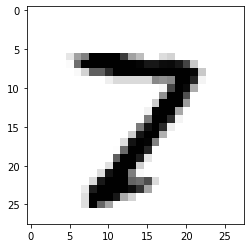

In [158]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        avg_cv = 0
        for i in range(liter):
            xdata, ydata = mnist.train.next_batch(batchsize)
            _,cv = session.run([train,cost],feed_dict={x:xdata,y:ydata})
            avg_cv += cv/liter
        print('epoch : {:04d}, cost : {:.9f}'.format(epoch+1,avg_cv))
    print('정확도 : ', accuracy.eval(session=session, feed_dict={x:mnist.test.images,y:mnist.test.labels}))
    randomnum = random.randint(0,mnist.test.num_examples-1)
    print('label : ', session.run(tf.argmax(mnist.test.labels[randomnum:randomnum+1],1)))
    print('pred  : ',session.run(tf.argmax(hf,1), feed_dict={x:mnist.test.images[randomnum:randomnum+1]}))
    
plt.imshow(mnist.test.images[randomnum:randomnum+1].reshape(28,28), cmap='Greys')
plt.show()

In [ ]:
# 2) keras ver)
# multi-layer perceptron

In [159]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [160]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [161]:
print(xtrain.shape,xtest.shape)

(60000, 28, 28) (10000, 28, 28)


In [162]:
# 전처리 
xtrain = xtrain.reshape(60000,784).astype('float32')/255.0
xtest = xtest.reshape(10000,784).astype('float32')/255.0

In [163]:
print(ytrain.shape, ytest.shape)

(60000,) (10000,)


In [164]:
# 원핫인코딩
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [165]:
xval = xtrain[42000:]
xtrain = xtrain[:42000]

yval = ytrain[42000:]
ytrain = ytrain[:42000]

In [166]:
# model 설정
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [167]:
# 학습 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 학습
model.fit(xtrain, ytrain, epochs=5, batch_size=50, validation_data=(xval,yval))

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 1s 34us/step - loss: 0.9366 - accuracy: 0.7693 - val_loss: 0.4988 - val_accuracy: 0.8699
Epoch 2/5
42000/42000 [==============================] - 1s 30us/step - loss: 0.4409 - accuracy: 0.8815 - val_loss: 0.3844 - val_accuracy: 0.8960
Epoch 3/5
42000/42000 [==============================] - 1s 30us/step - loss: 0.3670 - accuracy: 0.8978 - val_loss: 0.3418 - val_accuracy: 0.9068
Epoch 4/5
42000/42000 [==============================] - 1s 30us/step - loss: 0.3312 - accuracy: 0.9065 - val_loss: 0.3172 - val_accuracy: 0.9106
Epoch 5/5
42000/42000 [==============================] - 1s 31us/step - loss: 0.3082 - accuracy: 0.9129 - val_loss: 0.2991 - val_accuracy: 0.9152


In [168]:
# model 평가

metrics=model.evaluate(xtest, ytest, batch_size=50)
print('evaluation : '+str(metrics))

10000/10000 [==============================] - 0s 15us/step
evaluation : [0.2863397601526231, 0.9203000068664551]


In [169]:
# 예측
idx = np.random.choice(xtest.shape[0],5)
xhat = xtest[idx]
yhat = model.predict_classes(xhat)

In [170]:
for i in range(5):
    print('예측값 : '+ str(yhat[i]) + '실제값 : ' +str(np.argmax(ytest[idx[i]])))

예측값 : 0실제값 : 0
예측값 : 2실제값 : 2
예측값 : 0실제값 : 0
예측값 : 1실제값 : 1
예측값 : 7실제값 : 7


In [49]:
# model 저장
model.save('mnist_model.h5')

In [55]:
# model architecture 확인
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

# SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [171]:
# 실제 데이터 사용
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
xtest = xtest.reshape(10000,784).astype('float32')/255.0
ytest = np_utils.to_categorical(ytest)
idx = np.random.choice(xtest.shape[0],10)
xhat = xtest[idx]

In [172]:
# model 불러오기
from keras.models import load_model
model = load_model('mnist_model.h5')

In [173]:
yhat = model.predict_classes(xhat)

for i in range(10):
    print('예측값 : '+ str(yhat[i]) + '실제값 : '+str(np.argmax(ytest[idx[i]])))

예측값 : 6실제값 : 3
예측값 : 6실제값 : 9
예측값 : 6실제값 : 2
예측값 : 6실제값 : 6
예측값 : 8실제값 : 3
예측값 : 9실제값 : 9
예측값 : 6실제값 : 6
예측값 : 1실제값 : 1
예측값 : 2실제값 : 2
예측값 : 2실제값 : 4


In [78]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [62]:
xdata = xy[:,0:-1]
ydata = xy[:,[-1]]

In [79]:
print(xdata.shape, ydata.shape)

(8, 4) (8, 1)


In [80]:
def minmax(data):
    bm = np.max(data,axis=0)-np.min(data,axis=0)
    bj = data-np.min(data,axis=0)
    return bj/bm
    
xy = minmax(xy)

In [81]:
xdata = xy[:,0:-1]
ydata = xy[:,[-1]]

In [82]:
x = tf.placeholder(tf.float32,shape=[None,4])
y = tf.placeholder(tf.float32,shape=[None,1])
w = tf.Variable(tf.random_normal([4,1]))
b = tf.Variable(tf.random_normal([1]))

In [83]:
hf = tf.matmul(x,w)+b
cost = tf.reduce_mean(tf.square(hf-y))
train = tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [84]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for step in range(101):
        cv,hv,_ = session.run([cost,hf,train],feed_dict={x:xdata,y:ydata})
        print(step, 'cost : ',cv, '\npred : ', hv)

0 cost :  1.011451 
pred :  [[0.8927503]
 [2.3938956]
 [1.6975358]
 [0.8891778]
 [1.2878156]
 [1.32742  ]
 [1.0515997]
 [1.480178 ]]
1 cost :  1.0113984 
pred :  [[0.8927126]
 [2.3938546]
 [1.6975019]
 [0.8891518]
 [1.287785 ]
 [1.3273902]
 [1.0515779]
 [1.4801552]]
2 cost :  1.0113459 
pred :  [[0.8926749]
 [2.3938136]
 [1.697468 ]
 [0.8891257]
 [1.2877544]
 [1.3273604]
 [1.0515562]
 [1.4801323]]
3 cost :  1.011293 
pred :  [[0.89263725]
 [2.3937726 ]
 [1.697434  ]
 [0.88909966]
 [1.2877238 ]
 [1.3273306 ]
 [1.0515344 ]
 [1.4801095 ]]
4 cost :  1.0112404 
pred :  [[0.8925995]
 [2.3937316]
 [1.6974001]
 [0.8890736]
 [1.287693 ]
 [1.3273007]
 [1.0515127]
 [1.4800867]]
5 cost :  1.0111878 
pred :  [[0.8925618]
 [2.3936906]
 [1.6973661]
 [0.8890475]
 [1.2876625]
 [1.3272709]
 [1.051491 ]
 [1.4800639]]
6 cost :  1.0111351 
pred :  [[0.8925241]
 [2.3936496]
 [1.6973321]
 [0.8890215]
 [1.2876318]
 [1.327241 ]
 [1.0514692]
 [1.480041 ]]
7 cost :  1.0110824 
pred :  [[0.89248645]
 [2.3936086 ]

99 cost :  1.0062553 
pred :  [[0.88902426]
 [2.3898413 ]
 [1.6941789 ]
 [0.8866038 ]
 [1.2847881 ]
 [1.3244704 ]
 [1.0494521 ]
 [1.4779221 ]]
100 cost :  1.0062029 
pred :  [[0.8889867 ]
 [2.3898005 ]
 [1.6941451 ]
 [0.88657784]
 [1.2847575 ]
 [1.3244407 ]
 [1.0494304 ]
 [1.4778993 ]]


In [ ]:
# xor 문제 구현
# tf 단일 퍼셉트론

In [113]:
xdata = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
ydata = np.array([[0],
                  [1],
                  [1],
                  [0]])

In [114]:
# 10000, 0.1

In [115]:
print(xdata.shape, ydata.shape)

(4, 2) (4, 1)


In [116]:
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

In [117]:
hf = tf.sigmoid(tf.matmul(x,w)+b)
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [118]:
pred = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, y), dtype=tf.float32))

In [124]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv = session.run([train,cost], feed_dict={x:xdata, y:ydata})
        if step % 1000 == 0:
            print(step, cv)

    hv, pv, av = session.run([hf,pred,accuracy], feed_dict={x:xdata, y:ydata})
    print("\nHypothesis : ", hv, "\nPredicted : ", pv, "\nAccuracy : ", av)

0 0.7012743
1000 0.69314766
2000 0.6931472
3000 0.6931472
4000 0.6931472
5000 0.6931472
6000 0.6931472
7000 0.6931472
8000 0.6931472
9000 0.6931472
10000 0.6931472

Hypothesis :  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Predicted :  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy :  0.5


In [ ]:
# xor 문제 구현
# tf 멀티 퍼셉트론

In [129]:
xdata = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
ydata = np.array([[0],
                  [1],
                  [1],
                  [0]])

x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

w1 = tf.Variable(tf.random_normal([2,2]))
b1 = tf.Variable(tf.random_normal([2]))
layer1 = tf.sigmoid(tf.matmul(x,w1)+b1)

w2 = tf.Variable(tf.random_normal([2,2]))
b2 = tf.Variable(tf.random_normal([2]))
layer2 = tf.sigmoid(tf.matmul(x,w1)+b1)

w3 = tf.Variable(tf.random_normal([2,1]))
b3 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(layer1,w3)+b3)

In [130]:
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [131]:
pred = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, y), dtype=tf.float32))

In [132]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv = session.run([train,cost], feed_dict={x:xdata, y:ydata})
        if step % 1000 == 0:
            print(step, cv)

    hv, pv, av = session.run([hf,pred,accuracy], feed_dict={x:xdata, y:ydata})
    print("\nHypothesis : ", hv, "\nPredicted : ", pv, "\nAccuracy : ", av)
    #0.01091694

0 0.758927
1000 0.692829
2000 0.6805557
3000 0.5333448
4000 0.41674107
5000 0.38378555
6000 0.37094587
7000 0.3644222
8000 0.3605461
9000 0.3580016
10000 0.35621285

Hypothesis :  [[0.01091694]
 [0.49586132]
 [0.98909235]
 [0.5041306 ]] 
Predicted :  [[0.]
 [0.]
 [1.]
 [1.]] 
Accuracy :  0.5


In [133]:
xdata = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
ydata = np.array([[0],
                  [1],
                  [1],
                  [0]])

x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

w1= tf.Variable(tf.random_normal([2,10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1 = tf.sigmoid(tf.matmul(x,w1)+b1)

w2= tf.Variable(tf.random_normal([10,10]))
b2 = tf.Variable(tf.random_normal([10]))
layer2 = tf.sigmoid(tf.matmul(layer1,w2)+b2)

w3= tf.Variable(tf.random_normal([10,10]))
b3 = tf.Variable(tf.random_normal([10]))
layer4 = tf.sigmoid(tf.matmul(layer2,w3)+b3)

w4= tf.Variable(tf.random_normal([10,1]))
b4 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(layer4,w4)+b1)

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

pred = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, y), dtype=tf.float32))

with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv = session.run([train,cost], feed_dict={x:xdata, y:ydata})
#         if step % 1000 == 0:
#             print(step, cv)

    hv, pv, av = session.run([hf,pred,accuracy], feed_dict={x:xdata, y:ydata})
    print("\nHypothesis : ", hv, "\nPredicted : ", pv, "\nAccuracy : ", av)


Hypothesis :  [[5.7107210e-04 1.1042356e-03 8.0111623e-04 1.3730824e-03 4.5457482e-04
  7.5134635e-04 5.5369735e-04 1.3462603e-03 1.4874339e-03 8.9237094e-04]
 [9.9808878e-01 9.9901116e-01 9.9863708e-01 9.9920487e-01 9.9759960e-01
  9.9854684e-01 9.9802887e-01 9.9918890e-01 9.9926597e-01 9.9877644e-01]
 [9.9791783e-01 9.9892271e-01 9.9851513e-01 9.9913359e-01 9.9738497e-01
  9.9841690e-01 9.9785256e-01 9.9911630e-01 9.9920022e-01 9.9866688e-01]
 [1.3376474e-03 2.5847256e-03 1.8757880e-03 3.2125115e-03 1.0648370e-03
  1.7594695e-03 1.2969971e-03 3.1500161e-03 3.4796596e-03 2.0892918e-03]] 
Predicted :  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
Accuracy :  1.0
